<a href="https://colab.research.google.com/github/AliAramideh/Classification/blob/main/Classification_teleCust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

# Classification

## Import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Underestanding the Dataset

### Load the data

In [2]:
url = 'https://github.com/AliAramideh/Classification_teleCust/raw/main/teleCust1000t.csv'
dataset = pd.read_csv(url)
dataset

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


### Define `teleCust1000t.csv`
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.



### Data Exploration

In [3]:
dataset.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Data Visualization and Analysis


 Let’s see how many of each class is in our data set

In [4]:
dataset['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


### Diagrams

You can easily explore your data using visualization techniques:


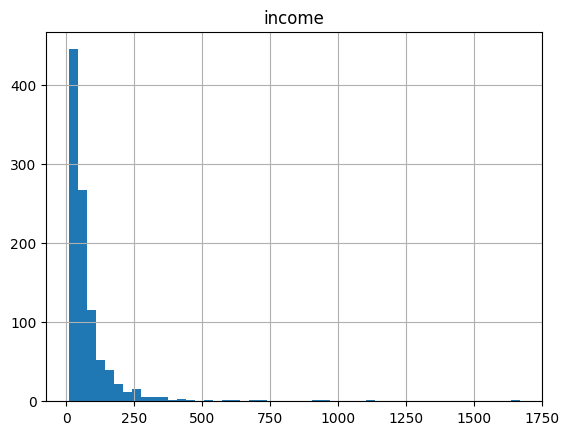

In [5]:
dataset.hist(column= 'income', bins= 50)
plt.show()

### Feature set

In [6]:
X = dataset.drop(columns= ['custcat'])
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [7]:
y = dataset['custcat']
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

### Normalizing the data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [ ]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X[0:5]

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for real world problems.


In [ ]:
# from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=4)

print('Train Set:', train_X.shape, train_y.shape)
print('Test Set: ', test_X.shape, test_y.shape)

## K-Nearest Neighbors(KNN)

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">



In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

### Modeling

#### Import library

Classifier implementing the k-nearest neighbors vote.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Let's start the algorithm with k=4 for now:


In [ ]:
k = 4
model_KNNClassifier_4 = KNeighborsClassifier(n_neighbors= k).fit(train_X, train_y)

### Predicting

We can use the model to make predictions on the test set:

In [ ]:
pred4_y = model_KNNClassifier_4.predict(test_X)
print(test_y[0:5].values)
print('-----------')
print(pred4_y[0:5])

### Evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [ ]:
# from sklearn.metrics import accuracy_score

print('Train set accuracy: %.2f' % accuracy_score(train_y, model_KNNClassifier_4.predict(train_X)))
print('Test set accuracy: %.2f' % accuracy_score(test_y, pred4_y))

This result is too bad. So we retrain with k=6

In [ ]:
k = 6
# Training
model_KNNClassifier_6 = KNeighborsClassifier(n_neighbors= k).fit(train_X, train_y)

# Predicting
pred6_y = model_KNNClassifier_6.predict(test_X)

# Evaluating
print('Test set accuracy: %.2f' % accuracy_score(test_y, pred6_y))

What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [ ]:
ks = 15
mean_acc = []

for n in range(1, ks+1):

  # training
  model_KNN = KNeighborsClassifier(n_neighbors= n).fit(train_X, train_y)

  # predictng
  pred_y = model_KNN.predict(test_X)

  # Evaluating
  mean_acc.append(accuracy_score(test_y, pred_y))

mean_acc = np.array(mean_acc)
mean_acc

The best K:

In [ ]:
accuracy_score_knn = mean_acc.max()
print('The best number of neghbers(K) is: ', mean_acc.argmax()+1, 'with accuracy value', mean_acc.max())

### Plot the model accuracy for a different number of neighbors.


In [ ]:
plt.plot(range(1, ks+1), mean_acc)
plt.xlabel('Number of Neghbers(K)')
plt.ylabel('Accuracy')
plt.show()

## Logistic Regression

### Modeling, Predicting and Evaluation

In [ ]:
# from sklearn.linear_model import LogisticRegression
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
index = ['AccuracyScore']
accuracy_df = pd.DataFrame(index=index)
for solver in solver:

  # Modeling
  model_log_reg = LogisticRegression(solver=solver)
  model_log_reg.fit(train_X, train_y)

  # Predicting
  pred_y_log_reg = model_log_reg.predict(test_X)

  # Evaluation
  accuracy_df[solver] = accuracy_score(test_y, pred_y_log_reg)

accuracy_df

As you see all solver is the same. Now we should choose the best C parameter

In [ ]:
C = [x/100 for x in range(1, 100)]
acc = []

for c in C:

  # Modeling
  model_log_reg = LogisticRegression(C=c)
  model_log_reg.fit(train_X, train_y)

  # Predicting
  pred_y_log_reg = model_log_reg.predict(test_X)

  # Evaluation
  acc.append(accuracy_score(test_y, pred_y_log_reg))

acc = np.array(acc)
print(acc)
print('##-----------------------------------------------------------')

accuracy_score_log_reg = acc.max()
print('Accuracy Score: ', accuracy_score_log_reg)

## Decision Tree

### Modeling

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
model_decision_tree.fit(train_X, train_y)

### Predicting

In [ ]:
pred_y_decision_tree = model_decision_tree.predict(test_X)
print(pred_y_decision_tree[0:5])
print(test_y[0:5].values)

### Evaluation

In [ ]:
accuracy_score_decision_tree = accuracy_score(test_y, pred_y_decision_tree)
print('Accuracy Score: ', accuracy_score_decision_tree)

## Comparing

In [ ]:
accuracy = {'AccuracyScore': [accuracy_score_knn,
                              accuracy_score_log_reg,
                              accuracy_score_decision_tree]}
index = ['KNN', 'LogReg', 'DecisionTree']
compare_df = pd.DataFrame(data=accuracy, index=index)
compare_df

In [ ]:
compare_df.loc[compare_df.idxmax()]

As you see the best classifire for this dataset is `LogisticRegression`